<a href="https://colab.research.google.com/github/dhiya-devassy/stock_price_prediction/blob/main/stocknlppredictionprojectmain_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define available stock options
stocks = {
    'Google (GOOGL)': 'GOOGL',
    'Apple (AAPL)': 'AAPL',
    'Microsoft (MSFT)': 'MSFT',
    'Amazon (AMZN)': 'AMZN',
    'Tesla (TSLA)': 'TSLA',
    'Facebook (FB)': 'FB',
    'NVDIA (NVDA)': 'NVDA',
    'Reliance (RELIANCE.NS)': 'RELIANCE.NS',
    'TCS (TCS.NS)': 'TCS.NS',
    'Tata Motors (TATAMOTORS.NS)': 'TATAMOTORS.NS'
}

# Create dropdown widget
stock_selector = widgets.Dropdown(
    options=list(stocks.keys()),
    description='Choose Stock:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output_stock = widgets.Output()

def on_stock_change(change):
    with output_stock:
        clear_output()
        selected_stock_name = change['new']
        selected_symbol = stocks[selected_stock_name]
        print(f"📈 Fetching data for: {selected_stock_name} ({selected_symbol})...")
        global data, start, end, stock  # make 'data', 'start', 'end', and 'stock' available to rest of notebook
        stock = selected_symbol # Update the global stock variable
        start = '2015-01-01' # Define start date
        end = '2026-01-01' # Define end date
        data = yf.download(selected_symbol, start=start, end=end)
        display(data.tail())

# Attach callback
stock_selector.observe(on_stock_change, names='value')

# Display dropdown and output
display(stock_selector, output_stock)

# Trigger initial selection to load data on notebook run
on_stock_change({'new': list(stocks.keys())[0]})

/tmp/ipython-input-275266681.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(selected_symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

📈 Fetching data for: NVDIA (NVDA) (NVDA)...


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-10-10,183.160004,195.619995,182.050003,193.509995,268774400
2025-10-13,188.320007,190.110001,185.960007,187.970001,153482800
2025-10-14,180.029999,184.800003,179.699997,184.770004,205641400
2025-10-15,179.830002,184.869995,177.289993,184.800003,214450500
2025-10-16,181.809998,183.279999,179.770004,182.229996,179045700


In [6]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2015-01-02,26.296135,26.606494,26.213205,26.447589,26480000
2015-01-05,25.795086,26.218665,25.710173,26.176953,41182000
2015-01-06,25.158482,25.881990,25.104354,25.846734,54456000
2015-01-07,25.084490,25.399318,25.010005,25.372504,46918000
2015-01-08,25.171888,25.201185,24.581459,24.903737,73054000
...,...,...,...,...,...
2025-10-10,236.570007,244.089996,235.839996,241.429993,33180300
2025-10-13,244.149994,244.500000,239.710007,240.210007,24995000


In [7]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2015-01-02,26.296135,26.606494,26.213205,26.447589,26480000
1,2015-01-05,25.795086,26.218665,25.710173,26.176953,41182000
2,2015-01-06,25.158482,25.881990,25.104354,25.846734,54456000
3,2015-01-07,25.084490,25.399318,25.010005,25.372504,46918000
4,2015-01-08,25.171888,25.201185,24.581459,24.903737,73054000
...,...,...,...,...,...,...
2709,2025-10-10,236.570007,244.089996,235.839996,241.429993,33180300
2710,2025-10-13,244.149994,244.500000,239.710007,240.210007,24995000
2711,2025-10-14,245.449997,247.119995,240.509995,241.229996,22111600


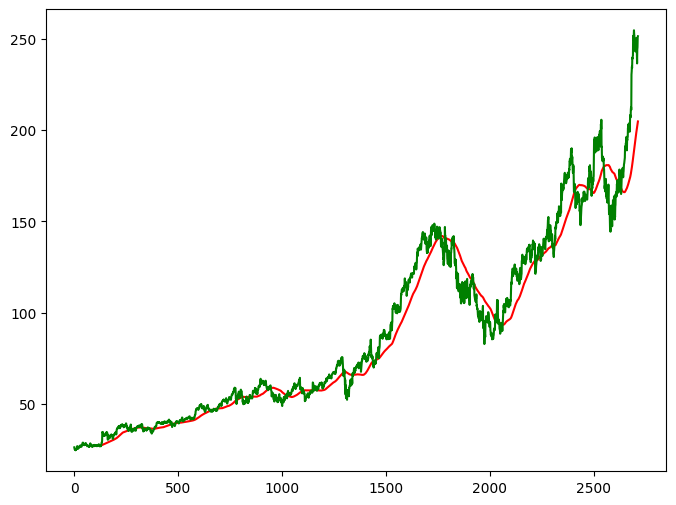

In [8]:
#moving average 100 days
ma_100_days=data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

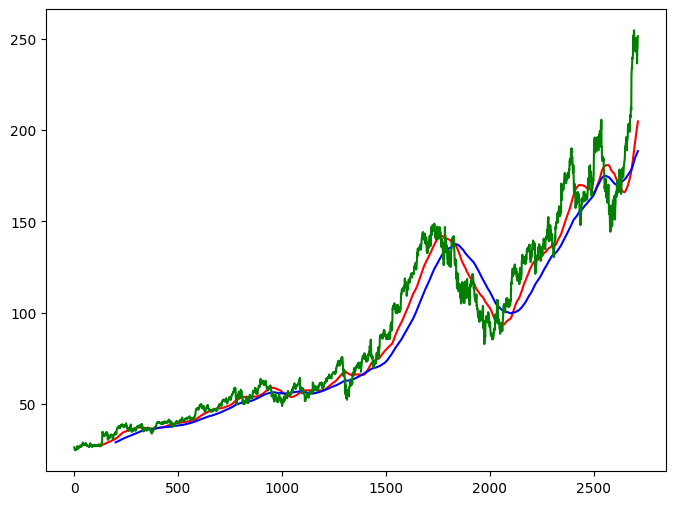

In [9]:
#moving average of 200 days
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
#80% training data 20%test data
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close.iloc[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]

2171

In [13]:
data_test.shape[0]

543

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale= scaler.fit_transform(data_train)

In [16]:
#array slicing -take 100 data and pred 101th data- of training data

x=[]
y=[]

for  i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [17]:
x,y=np.array(x),np.array(y)

In [18]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

In [19]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - loss: 0.0890
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.0086
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0075
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0080
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0063
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0060
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0056
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0048
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0055
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0048
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0042
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0039
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0041
E

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days=data_train.tail(100)

In [23]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [24]:
data_test

Ticker,GOOGL
0,101.758163
1,100.337959
2,100.695496
3,100.198921
4,103.019478
...,...
638,236.570007
639,244.149994
640,245.449997
641,251.029999


In [25]:
data_test_scale=scaler.fit_transform(data_test)

In [26]:
#array sclicing of test data
x=[]
y=[]

for  i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [27]:
y_predict=model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


In [28]:
y_predict

array([[0.22200507],
       [0.22324866],
       [0.22416224],
       [0.22479221],
       [0.22526893],
       [0.2256684 ],
       [0.22603855],
       [0.22643119],
       [0.22697496],
       [0.22781458],
       [0.22905922],
       [0.23073941],
       [0.23282689],
       [0.23521204],
       [0.237753  ],
       [0.24035925],
       [0.2429744 ],
       [0.24551265],
       [0.2479191 ],
       [0.25018197],
       [0.25230917],
       [0.2543301 ],
       [0.256268  ],
       [0.2580084 ],
       [0.2593494 ],
       [0.26012507],
       [0.26025158],
       [0.25969306],
       [0.25848472],
       [0.25677943],
       [0.25473052],
       [0.2525831 ],
       [0.2505192 ],
       [0.24874865],
       [0.24742134],
       [0.24666464],
       [0.24658841],
       [0.24722402],
       [0.24859732],
       [0.25063276],
       [0.25314173],
       [0.25593382],
       [0.25887552],
       [0.2617795 ],
       [0.2644313 ],
       [0.26665288],
       [0.2683372 ],
       [0.269

In [29]:
scale=1/scaler.scale_

In [30]:
y_predict=y_predict*scale

In [31]:
y=y*scale

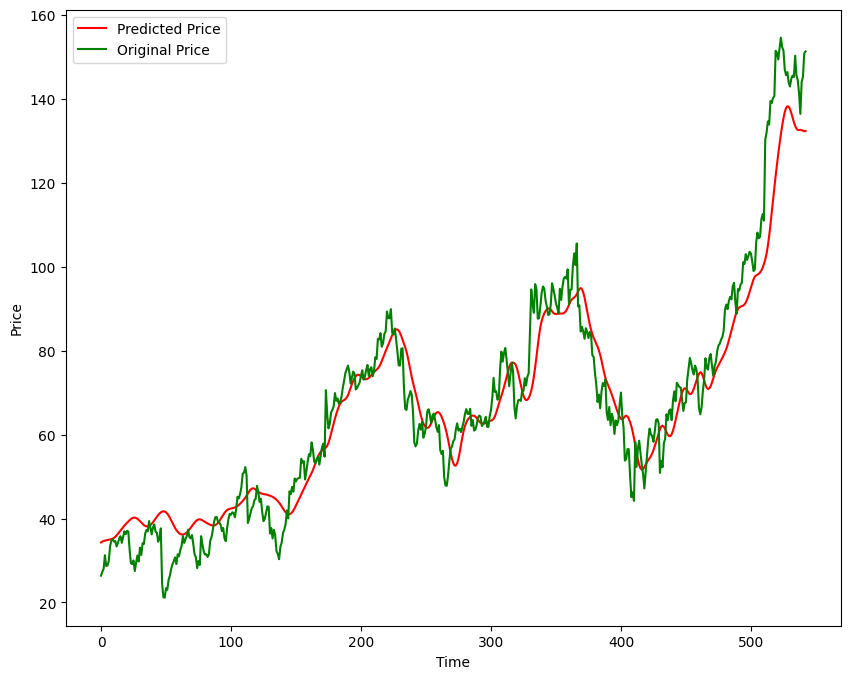

In [32]:
#original vs predicted price
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [33]:
# prompt: also print accuracy percentage

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mean_squared_error(y, y_predict))
r2 = r2_score(y, y_predict)

# Calculate accuracy percentage (using R-squared as a proxy for explanatory power)
# R-squared indicates how well the model explains the variance in the target variable.
# While not a direct 'accuracy' in terms of classification, it's a common metric
# in regression to gauge how well the predictions fit the actual data.
# We'll present it as a percentage for ease of understanding.
accuracy_percentage = r2 * 100

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R2): {r2:.4f}")
print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

Accuracy Percentage: 92.09%


In [34]:
#predicting 7 days price
from sklearn.preprocessing import MinMaxScaler

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data[['Close']]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [35]:

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(df_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [36]:
#small model to predict 7 days price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0177
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5651e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4560e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4012e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4896e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2918e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9874e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7210e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6627e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7649e-04
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3175e-04
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5304e-04
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1634e-04
Epoch 14/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2022e-04
Epoch 15/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
#7days
n_future_days = 7
last_window = df_scaled[-window_size:].reshape(1, window_size, 1)
future_predictions = []

for _ in range(n_future_days):
    next_pred = model.predict(last_window)[0][0]
    future_predictions.append(next_pred)
    last_window = np.append(last_window[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
#plotting next 7 days price
import matplotlib.pyplot as plt
import pandas as pd

last_date = df.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, n_future_days + 1)]

plt.figure(figsize=(10,5))
plt.plot(df.index[-100:], df.Close[-100:], label='Historical')
plt.plot(future_dates, future_predictions_actual, label='Forecast')
plt.legend()
plt.title('Stock Price Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
##Live predicting of price of future days


# Fetch most recent data (past 100 days to today)
import datetime

end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=100)

live_data = yf.download(stock, start=start_date, end=end_date)
live_data.reset_index(inplace=True)
live_data.set_index('Date', inplace=True)

# Prepare and scale
live_df = live_data[['Close']]
live_scaled = scaler.transform(live_df)

# Update prediction window
last_window_live = live_scaled[-window_size:].reshape(1, window_size, 1)

# Predict next 7 days using the trained model
live_predictions = []

for _ in range(n_future_days):
    next_pred = model.predict(last_window_live)[0][0]
    live_predictions.append(next_pred)
    last_window_live = np.append(last_window_live[:, 1:, :], [[[next_pred]]], axis=1)

live_predictions_actual = scaler.inverse_transform(np.array(live_predictions).reshape(-1, 1))

# Future dates for the live forecast
last_live_date = live_df.index[-1]
live_future_dates = [last_live_date + pd.Timedelta(days=i) for i in range(1, n_future_days + 1)]

# Plot
plt.figure(figsize=(10,5))
plt.plot(live_df.index[-60:], live_df.Close[-60:], label='Recent Actual')
plt.plot(live_future_dates, live_predictions_actual, label='Live Forecast')
plt.title(f'Live Forecast for {stock} Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
print(live_predictions_actual)

In [41]:
#predicting price of 7 days  by selecting dates- next 7 days


import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Assuming 'future_dates' contains list of predicted dates
# and 'predicted_prices' contains corresponding predictions
# Modify these if named differently
try:
    future_data = pd.DataFrame({
        "Date": pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7),
        "Predicted Price": live_predictions_actual.flatten()
    })
except Exception as e:
    print("Error generating prediction view:", e)
    raise

# Widget to select a date
date_selector = widgets.Dropdown(
    options=[(str(date.date()), i) for i, date in enumerate(future_data["Date"])],
    description='Select Date:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output = widgets.Output()

def on_date_change(change):
    with output:
        clear_output()
        idx = change['new']
        selected_row = future_data.iloc[idx]
        print(f"Prediction for {selected_row['Date'].date()}: ₹{selected_row['Predicted Price']:.2f}")

date_selector.observe(on_date_change, names='value')

display(date_selector, output)
# Trigger initial display
on_date_change({'new': 0})

Dropdown(description='Select Date:', layout=Layout(width='50%'), options=(('2025-10-17', 0), ('2025-10-18', 1)…

Output()